Context: 

 

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage. 

 

Problem Statement: 

 

Build a model to accurately predict whether the patients in the dataset have diabetes or not? 

 

Dataset Description: 

 

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on. 

 

 
Pregnancies: Number of times pregnant 

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test 

BloodPressure: Diastolic blood pressure (mm Hg) 

SkinThickness: Triceps skin fold thickness (mm) 

Insulin: 2-Hour serum insulin (mu U/ml) 

BMI: Body mass index (weight in kg/(height in m)^2) 

DiabetesPedigreeFunction: Diabetes pedigree function 

Age: Age (years) 

Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0 

 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import sklearn.metrics as metrics
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
import seaborn as sns; sns.set()
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [2]:
data = pd.read_csv("healthcarediabetes.csv")

In [3]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [7]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
## showing the count of Nans
print(data.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


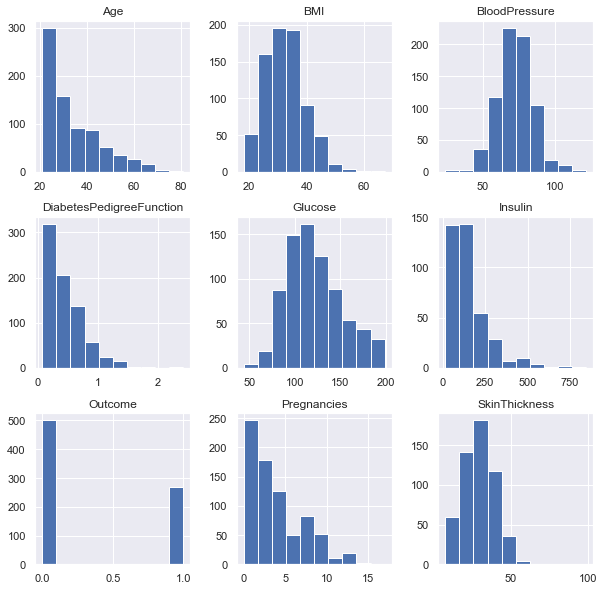

In [8]:
data.hist(figsize=(10,10));

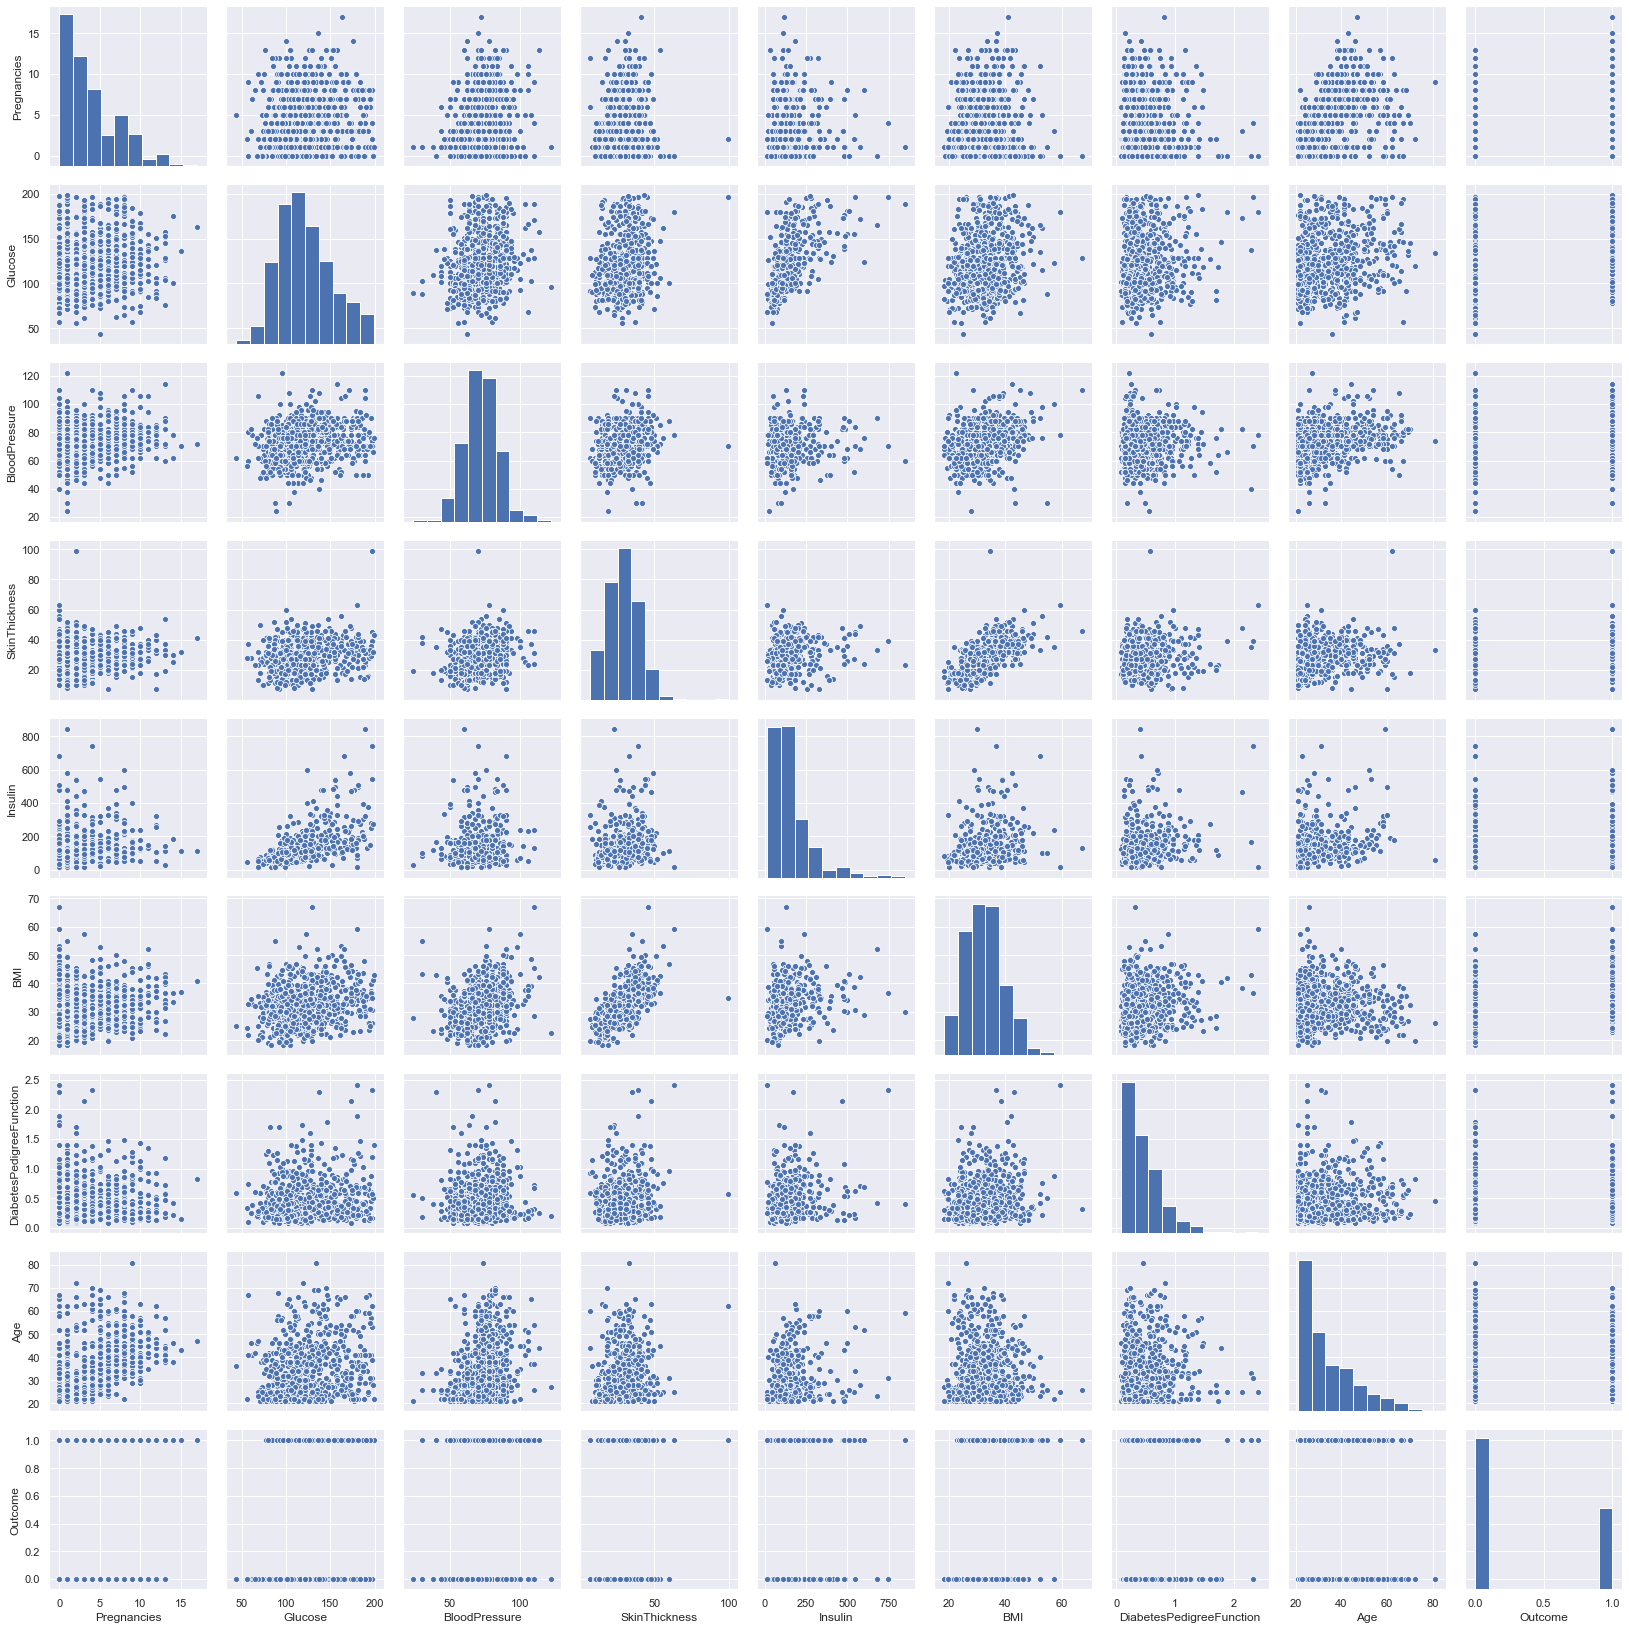

In [9]:
sns.pairplot(data);

In [10]:
data['Glucose'].fillna(data['Glucose'].mean(), inplace = True)
data['BloodPressure'].fillna(data['BloodPressure'].mean(), inplace = True)
data['SkinThickness'].fillna(data['SkinThickness'].median(), inplace = True)
data['Insulin'].fillna(data['Insulin'].median(), inplace = True)
data['BMI'].fillna(data['BMI'].median(), inplace = True)

In [11]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


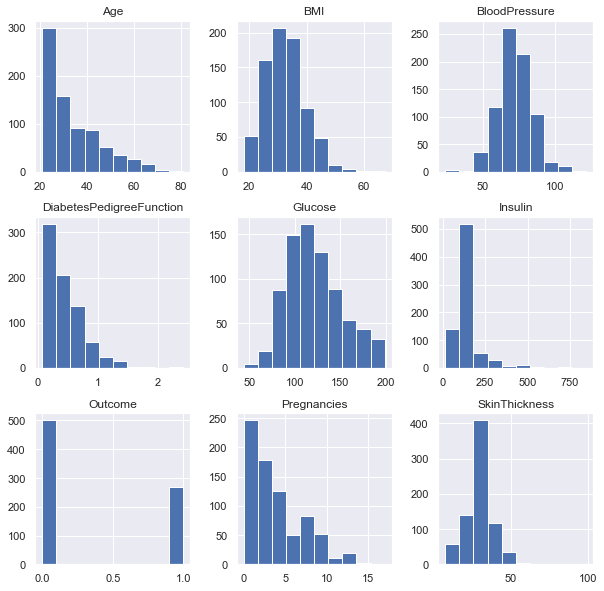

In [12]:
data.hist(figsize=(10,10));

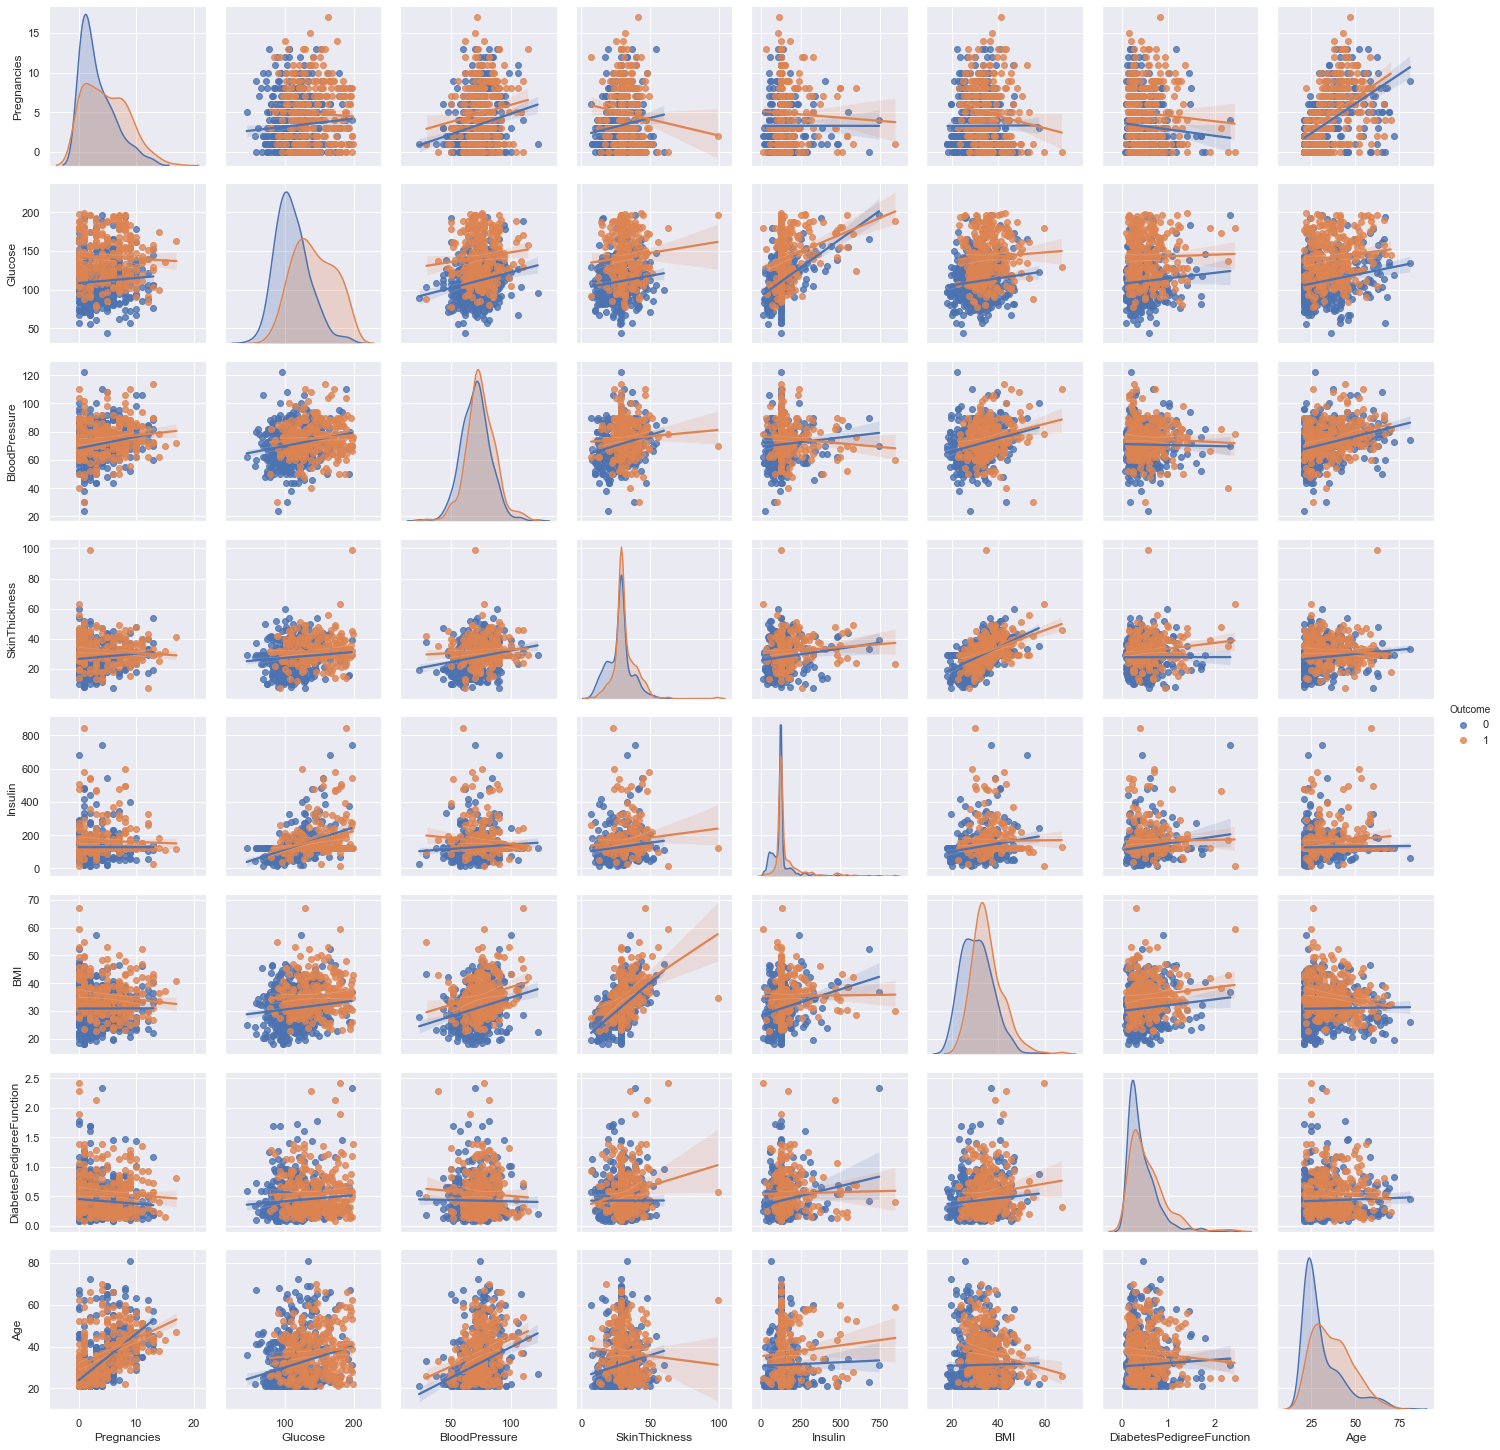

In [13]:
sns.pairplot(data=data,hue='Outcome',diag_kind='kde', kind="reg")
plt.show()

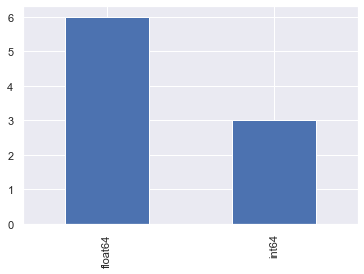

In [14]:
data.dtypes.value_counts().plot(kind='bar');

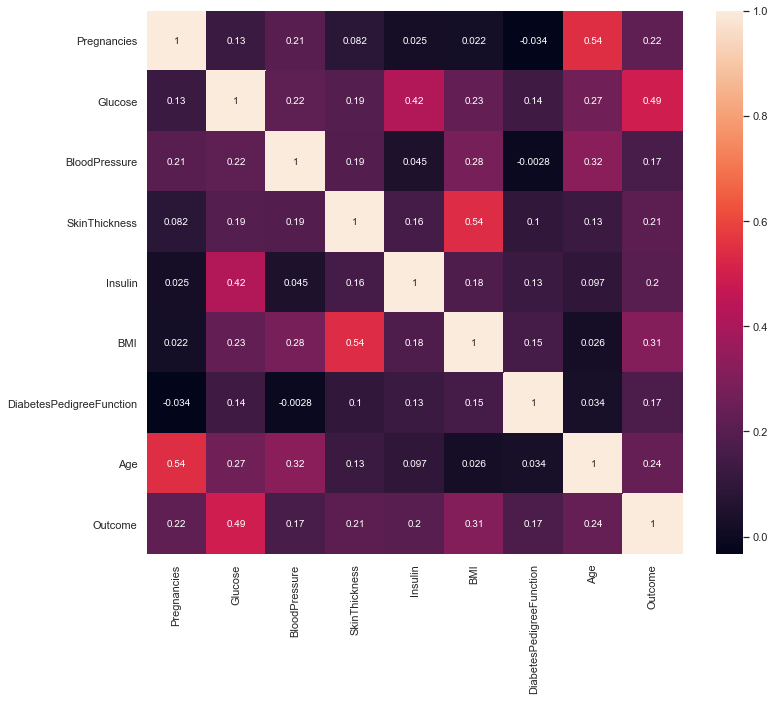

In [15]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
ax = sns.heatmap(data.corr(), annot=True)

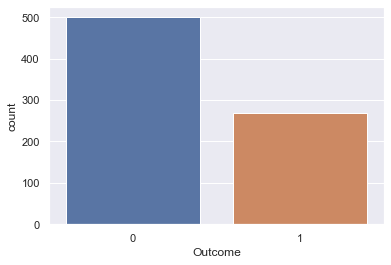

In [16]:
sns.countplot(x='Outcome',data=data)
plt.show()

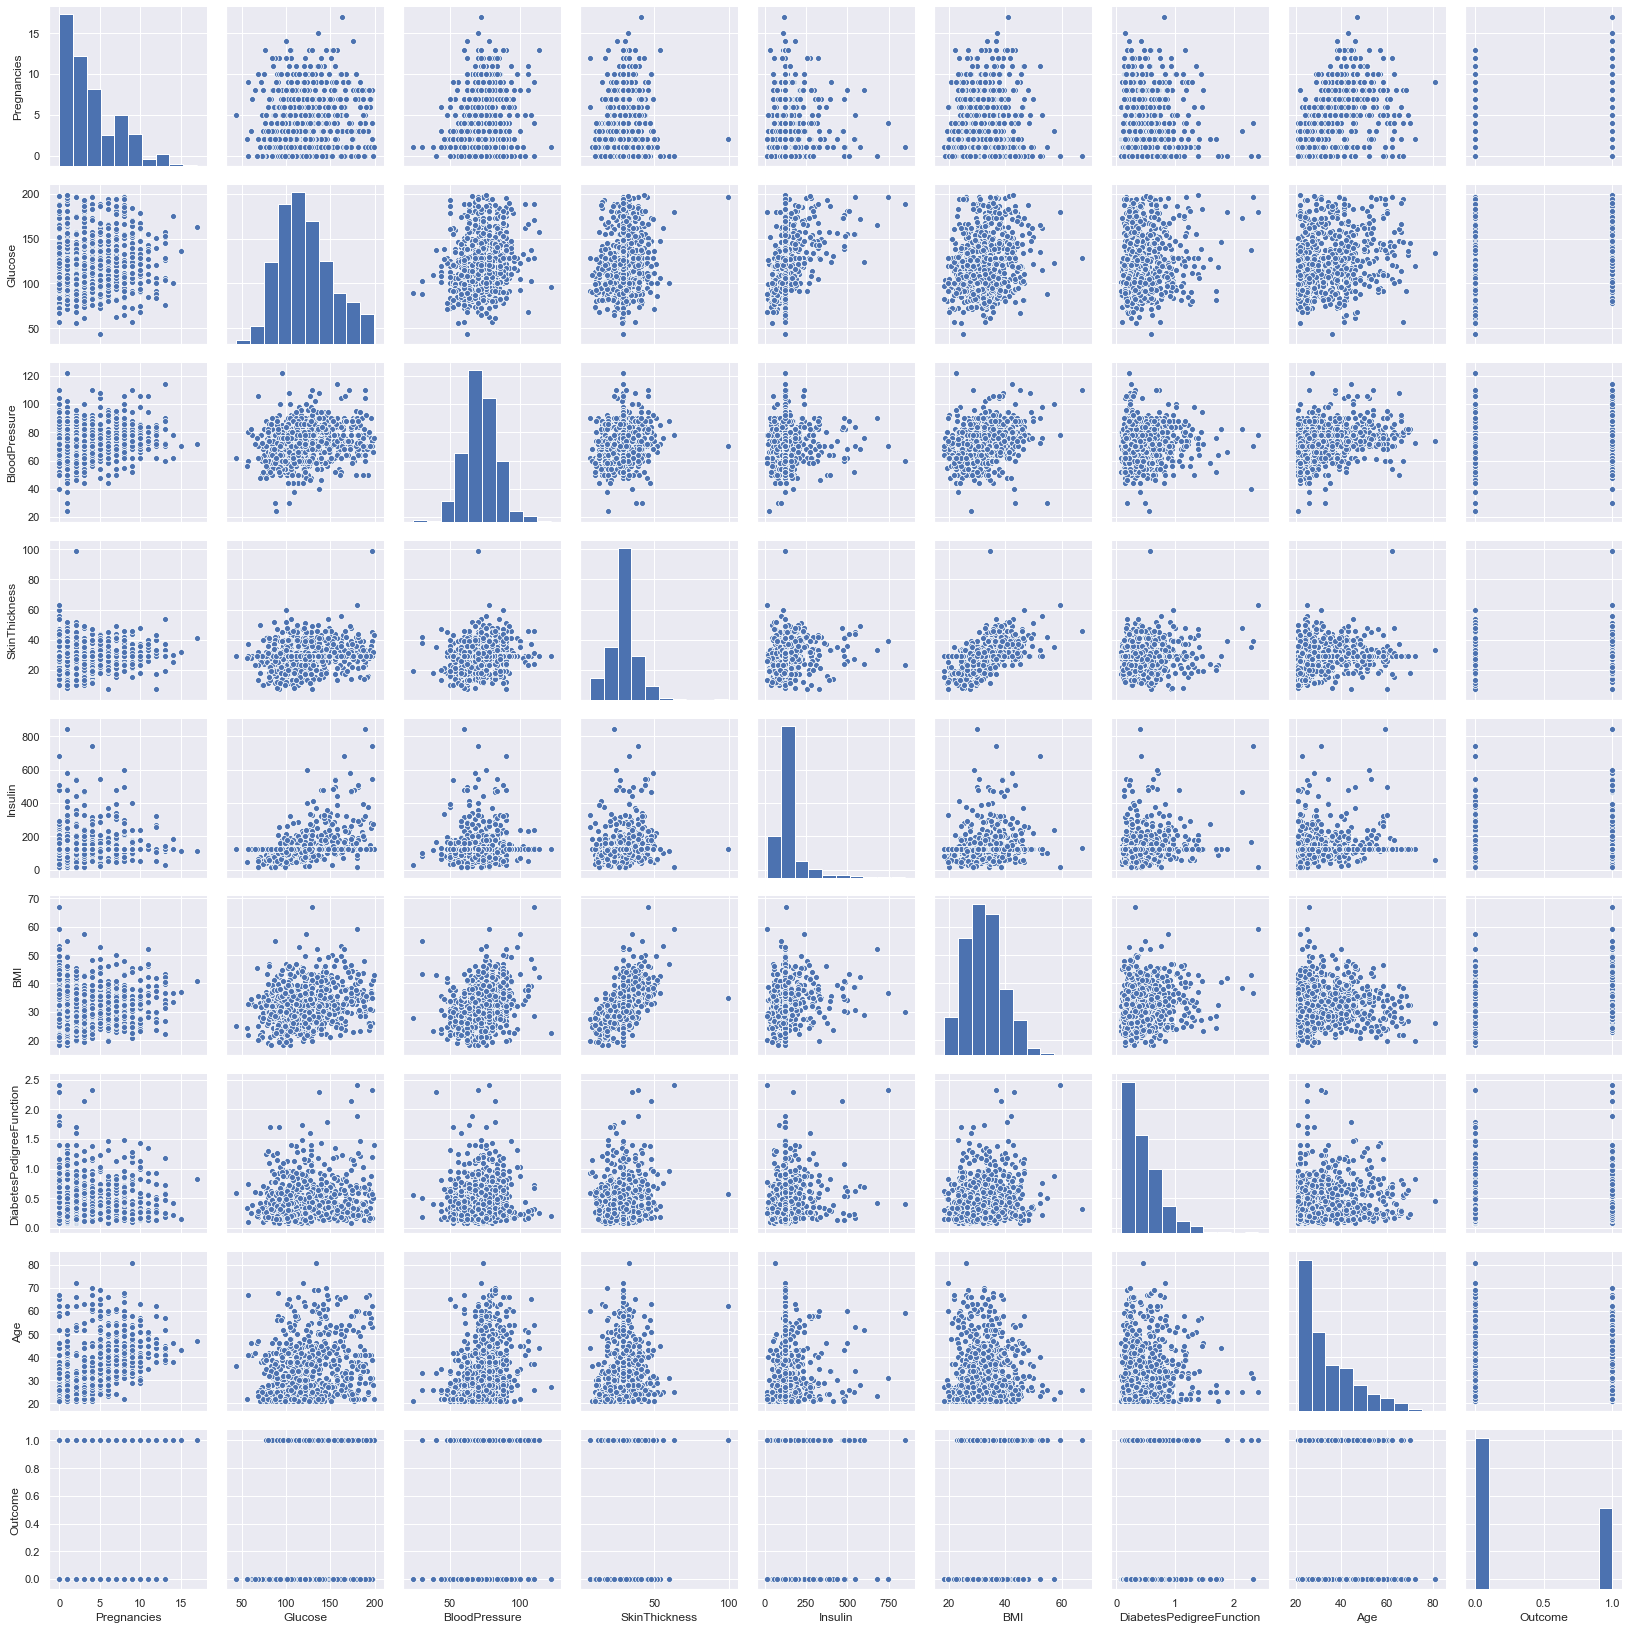

In [17]:
sns.pairplot(data=data)
plt.show()

In [18]:
## Scale the data

In [19]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(data.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [20]:
y = data['Outcome']
y.head(5)

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [21]:
y.shape

(768,)

In [22]:
## From the outcome column, we get to know that this is a classification problem
## also we have two classes, 0 and 1 , 0 indicating not diabetic and 1 indicating diabetic.
## From the bar plot we see that the classes are imbalanced and hence we conclude
## that we cannot consider accuracy_score to select the models.
## We will have to check the f1 weighted score , roc_auc score and other parameters as well.

In [23]:
#Cross Validate using StratifiedKFold Method.
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=45)
cv_score =[]
f1_scores = []
macro_roc_auc_ovo_scores = []
weighted_roc_auc_ovo_scores = []
i=1
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    #model
    KNN_clf = KNeighborsClassifier(n_neighbors=3)
    KNN_clf.fit(xtr, ytr)
    ypred = KNN_clf.predict(xvl)
    score = metrics.accuracy_score(yvl,ypred)
    f1_score = metrics.f1_score(yvl,ypred,average='weighted')
    print('score: '+str(score)+' f1_score: '+str(f1_score)+"\n\n")
    cv_score.append(score)
    f1_scores.append(f1_score)
    print(metrics.classification_report(yvl, ypred, labels=[0,1]))
    print('Confusion matrix '+'\n',metrics.confusion_matrix(yvl,ypred))
    print('\n\n')
    i+=1
print('Cv',cv_score,'\nMean cv Score',np.mean(cv_score))
print('\n\n')
print('f1_score',f1_scores,'\nMean f1 weighted Score',np.mean(f1_scores))
print('\n\n')

1 of KFold 10
score: 0.7402597402597403 f1_score: 0.7422475483699973


              precision    recall  f1-score   support

           0       0.81      0.78      0.80        50
           1       0.62      0.67      0.64        27

    accuracy                           0.74        77
   macro avg       0.72      0.72      0.72        77
weighted avg       0.75      0.74      0.74        77

Confusion matrix 
 [[39 11]
 [ 9 18]]



2 of KFold 10
score: 0.7532467532467533 f1_score: 0.7429428793517082


              precision    recall  f1-score   support

           0       0.77      0.88      0.82        50
           1       0.70      0.52      0.60        27

    accuracy                           0.75        77
   macro avg       0.74      0.70      0.71        77
weighted avg       0.75      0.75      0.74        77

Confusion matrix 
 [[44  6]
 [13 14]]



3 of KFold 10
score: 0.6623376623376623 f1_score: 0.6454817324382541


              precision    recall  f1-score   suppo

In [24]:
n_neighbors = [3,5,7,9]
weights = ['uniform', 'distance']
p = [1,2,3]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size = [30, 40, 50, 60, 70]
random_grid = {'n_neighbors': n_neighbors,
               'weights': weights,
               'p': p,
               'algorithm': algorithm,
               'leaf_size': leaf_size}
print(random_grid)

{'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'p': [1, 2, 3], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size': [30, 40, 50, 60, 70]}


In [25]:
KNN_clf = KNeighborsClassifier()
clf_random = RandomizedSearchCV(estimator = KNN_clf, param_distributions = random_grid, n_iter = 120, cv = 4, verbose=2, random_state=42, n_jobs = -1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

clf_random.fit(X_train, y_train)
clf_random.best_params_

Fitting 4 folds for each of 120 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    5.9s finished


{'weights': 'uniform',
 'p': 3,
 'n_neighbors': 9,
 'leaf_size': 50,
 'algorithm': 'auto'}

In [26]:
#Cross Validate using StratifiedKFold Method.
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=45)
cv_score =[]
f1_scores = []
macro_roc_auc_ovo_scores = []
weighted_roc_auc_ovo_scores = []
i=1
KNN_clf = clf_random.best_estimator_
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    KNN_clf.fit(xtr, ytr)
    ypred = KNN_clf.predict(xvl)
    score = metrics.accuracy_score(yvl,ypred)
    f1_score = metrics.f1_score(yvl,ypred,average='weighted')
    print('score: '+str(score)+' f1_score: '+str(f1_score)+"\n\n")
    cv_score.append(score)
    f1_scores.append(f1_score)
    print(metrics.classification_report(yvl, ypred, labels=[0,1]))
    print('Confusion matrix '+'\n',metrics.confusion_matrix(yvl,ypred))
    print('\n\n')
    i+=1
print('Cv',cv_score,'\nMean cv Score',np.mean(cv_score))
print('\n\n')
print('f1_score',f1_scores,'\nMean f1 weighted Score',np.mean(f1_scores))
print('\n\n')

1 of KFold 10
score: 0.7532467532467533 f1_score: 0.7521404431548276


              precision    recall  f1-score   support

           0       0.80      0.82      0.81        50
           1       0.65      0.63      0.64        27

    accuracy                           0.75        77
   macro avg       0.73      0.72      0.73        77
weighted avg       0.75      0.75      0.75        77

Confusion matrix 
 [[41  9]
 [10 17]]



2 of KFold 10
score: 0.7272727272727273 f1_score: 0.7198515769944341


              precision    recall  f1-score   support

           0       0.76      0.84      0.80        50
           1       0.64      0.52      0.57        27

    accuracy                           0.73        77
   macro avg       0.70      0.68      0.69        77
weighted avg       0.72      0.73      0.72        77

Confusion matrix 
 [[42  8]
 [13 14]]



3 of KFold 10
score: 0.6883116883116883 f1_score: 0.6776525361431022


              precision    recall  f1-score   suppo

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

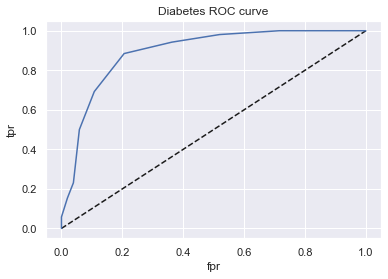

In [28]:
from sklearn.metrics import roc_curve
y_pred_proba = KNN_clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Diabetes ROC curve')
plt.show()

In [29]:
weighted_roc_auc_score = roc_auc_score(y_test, y_pred_proba, average="weighted")
print("ROC Score for KNN clf is ",weighted_roc_auc_score*100)

ROC Score for KNN clf is  89.2156862745098


In [30]:
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=45)
cv_score =[]
f1_scores = []
i=1
#model
clf = RandomForestClassifier(n_estimators=100,random_state=100,criterion='entropy',n_jobs=-1)
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    clf.fit(xtr,ytr)
    ypred = clf.predict(xvl)
    score = metrics.accuracy_score(yvl,ypred)
    f1_score = metrics.f1_score(yvl,ypred,average='weighted')
    print('score: '+str(score)+' f1_score: '+str(f1_score))
    #print(clf.predict_proba(xvl)[:5])
    y_prob = clf.predict_proba(xvl)
    cv_score.append(score)
    f1_scores.append(f1_score)
    print(metrics.classification_report(yvl, ypred, labels=[0,1]))
    print('Confusion matrix '+'\n',metrics.confusion_matrix(yvl,ypred))
    print('\n\n')
    i+=1
print('Cv',cv_score,'\nMean cv Score',np.mean(cv_score))
print('\n\n')
print('f1_score',f1_scores,'\nMean f1 weighted Score',np.mean(f1_scores))
print('\n\n')

1 of KFold 10
score: 0.7142857142857143 f1_score: 0.7083516483516483
              precision    recall  f1-score   support

           0       0.76      0.82      0.79        50
           1       0.61      0.52      0.56        27

    accuracy                           0.71        77
   macro avg       0.68      0.67      0.67        77
weighted avg       0.71      0.71      0.71        77

Confusion matrix 
 [[41  9]
 [13 14]]



2 of KFold 10
score: 0.7662337662337663 f1_score: 0.7545642763034068
              precision    recall  f1-score   support

           0       0.78      0.90      0.83        50
           1       0.74      0.52      0.61        27

    accuracy                           0.77        77
   macro avg       0.76      0.71      0.72        77
weighted avg       0.76      0.77      0.75        77

Confusion matrix 
 [[45  5]
 [13 14]]



3 of KFold 10
score: 0.6493506493506493 f1_score: 0.6398091704214153
              precision    recall  f1-score   support

  

In [31]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [32]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model

rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.4min finished


{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': False}

In [33]:
kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=45)
cv_score =[]
f1_scores = []
i=1
#model
rf_clf = rf_random.best_estimator_
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    rf_clf.fit(xtr,ytr)
    ypred = rf_clf.predict(xvl)
    score = metrics.accuracy_score(yvl,ypred)
    f1_score = metrics.f1_score(yvl,ypred,average='weighted')
    print('score: '+str(score)+' f1_score: '+str(f1_score))
    y_prob = rf_clf.predict_proba(xvl)
    cv_score.append(score)
    f1_scores.append(f1_score)
    print(metrics.classification_report(yvl, ypred, labels=[0,1]))
    print('Confusion matrix '+'\n',metrics.confusion_matrix(yvl,ypred))
    print('\n\n')
    i+=1
print('Cv',cv_score,'\nMean cv Score',np.mean(cv_score))
print('\n\n')
print('f1_score',f1_scores,'\nMean f1 weighted Score',np.mean(f1_scores))
print('\n\n')

1 of KFold 10
score: 0.7142857142857143 f1_score: 0.7083516483516483
              precision    recall  f1-score   support

           0       0.76      0.82      0.79        50
           1       0.61      0.52      0.56        27

    accuracy                           0.71        77
   macro avg       0.68      0.67      0.67        77
weighted avg       0.71      0.71      0.71        77

Confusion matrix 
 [[41  9]
 [13 14]]



2 of KFold 10
score: 0.7792207792207793 f1_score: 0.7732131813764467
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        50
           1       0.73      0.59      0.65        27

    accuracy                           0.78        77
   macro avg       0.76      0.74      0.75        77
weighted avg       0.77      0.78      0.77        77

Confusion matrix 
 [[44  6]
 [11 16]]



3 of KFold 10
score: 0.6623376623376623 f1_score: 0.6507902474883608
              precision    recall  f1-score   support

  

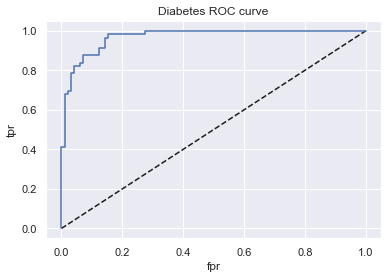

In [34]:
y_pred_proba = rf_clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Diabetes ROC curve')
plt.show()

In [35]:
weighted_roc_auc_score = roc_auc_score(y_test, y_pred_proba, average="weighted")
print("ROC Score for RF clf is ",weighted_roc_auc_score*100)

ROC Score for RF clf is  96.93877551020408


In [34]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test,y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("f1_score: %.2f%%" % (f1score * 100.0))
scores = cross_val_score(model, X, y, cv=5)
f1scores = cross_val_score(model, X, y, cv=5,scoring=make_scorer(f1_score, average='weighted', labels=[0,1]))
print("f1 scores: ",f1scores*100)
print("Accuracy scores: ",scores*100)
print("mean cross val score",scores.mean()*100,'%')
print("stddev for cross val scores",scores.std()*100,'%')
print("mean cross val f1 score",f1scores.mean()*100,'%')
print("stddev for cross val f1 scores",f1scores.std()*100,'%')

Accuracy: 73.38%
f1_score: 63.06%
f1 scores:  [72.13584903 73.77334707 69.88405155 77.55991285 73.01037143]
Accuracy scores:  [72.07792208 73.37662338 70.77922078 77.77777778 73.20261438]
mean cross val score 73.4428316781258 %
stddev for cross val scores 2.358459107736581 %
mean cross val f1 score 73.272706387282 %
stddev for cross val f1 scores 2.5089849046090524 %


In [35]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_depth = [int(x) for x in np.linspace(1, 50, num = 20)]
max_depth.append(None)
booster = ['gbtree','gblinear','dart']
learning_rate = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
max_delta_step = [0,1,2,3,4,5]
min_child_weight = [1,2,3,4,5]
gamma = [0,5,10,15,20,25]
tree_method = ['auto', 'exact', 'approx', 'hist', 'gpu_hist']
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'booster': booster,
               'learning_rate': learning_rate,
               'max_delta_step': max_delta_step,
               'min_child_weight': min_child_weight,
               'gamma': gamma,
               'tree_method': tree_method}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_depth': [1, 3, 6, 8, 11, 13, 16, 19, 21, 24, 26, 29, 31, 34, 37, 39, 42, 44, 47, 50, None], 'booster': ['gbtree', 'gblinear', 'dart'], 'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'max_delta_step': [0, 1, 2, 3, 4, 5], 'min_child_weight': [1, 2, 3, 4, 5], 'gamma': [0, 5, 10, 15, 20, 25], 'tree_method': ['auto', 'exact', 'approx', 'hist', 'gpu_hist']}


In [36]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
clf = XGBClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model

#split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

clf_random.fit(X_train, y_train)
clf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.2min finished


{'tree_method': 'hist',
 'n_estimators': 1800,
 'min_child_weight': 5,
 'max_depth': 42,
 'max_delta_step': 0,
 'learning_rate': 0.8,
 'gamma': 10,
 'booster': 'gbtree'}

In [37]:
model = clf_random.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test,y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("f1_score: %.2f%%" % (f1score * 100.0))
scores = cross_val_score(model, X, y, cv=5)
f1scores = cross_val_score(model, X, y, cv=5,scoring=make_scorer(f1_score, average='weighted', labels=[0,1]))
print("f1 scores: ",f1scores*100)
print("Accuracy scores: ",scores*100)
print("mean cross val score",scores.mean()*100,'%')
print("stddev for cross val scores",scores.std()*100,'%')
print("mean cross val f1 score",f1scores.mean()*100,'%')
print("stddev for cross val f1 scores",f1scores.std()*100,'%')

Accuracy: 74.03%
f1_score: 64.29%
f1 scores:  [73.05510024 69.76445384 73.31919781 80.57453666 72.0045876 ]
Accuracy scores:  [73.37662338 69.48051948 74.02597403 81.04575163 73.85620915]
mean cross val score 74.35701553348612 %
stddev for cross val scores 3.7374046789473847 %
mean cross val f1 score 73.74357522860747 %
stddev for cross val f1 scores 3.6379558302081603 %


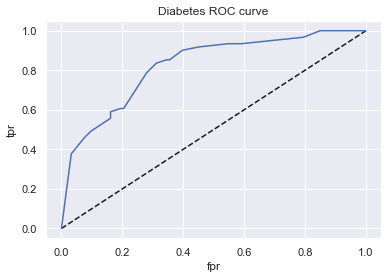

In [38]:
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Diabetes ROC curve')
plt.show()

In [39]:
weighted_roc_auc_score = roc_auc_score(y_test, y_pred_proba, average="weighted")
print("ROC Score for XGBOOST clf is ",weighted_roc_auc_score*100)

ROC Score for XGBOOST clf is  82.31094658910628


In [40]:
clf = LogisticRegression(random_state=0,C=100)
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
print(metrics.f1_score(y_test, ypred,average='weighted')*100,"%")

scores = cross_val_score(clf, X, y, cv=5,scoring="f1_weighted")
print(scores*100)
print("mean f1_weighted score: ",scores.mean()*100,"%")
print("std dev: ",scores.std()*100,"%")

74.43962725113481 %
[75.23799794 73.6402946  77.40922672 79.09367322 76.22342389]
mean f1_weighted score:  76.32092327540312 %
std dev:  1.8569087297147124 %


In [41]:
C = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
class_weight = ['dict', 'balanced', 'none']
dual = [True,False]
fit_intercept = [True,False]
penalty = ['l1', 'l2', 'elasticnet', 'none']
l1_ratio = [0,0.2,0.4,0.6,0.8,1]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = [11000]
random_grid = {'C': C,
               'class_weight': class_weight,
               'fit_intercept':fit_intercept,
               'solver':solver,
               'dual': dual,
               'penalty': penalty,
               'l1_ratio': l1_ratio,
               'max_iter': max_iter
              }
print(random_grid)

{'C': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200], 'class_weight': ['dict', 'balanced', 'none'], 'fit_intercept': [True, False], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'dual': [True, False], 'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1], 'max_iter': [11000]}


In [42]:
clf = LogisticRegression(random_state=0)
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 1000, cv = 3, verbose=2, n_jobs = -1)
clf_random.fit(X_train, y_train)
clf_random.best_params_

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:    7.8s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


{'solver': 'newton-cg',
 'penalty': 'l2',
 'max_iter': 11000,
 'l1_ratio': 1,
 'fit_intercept': True,
 'dual': False,
 'class_weight': 'dict',
 'C': 20}

In [43]:
clf = clf_random.best_estimator_
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
print(metrics.f1_score(y_test, ypred,average='weighted')*100,"%")

scores = cross_val_score(clf, X, y, cv=5)
print(scores*100)
print("mean f1_weighted score: ",scores.mean()*100,"%")
print("std dev: ",scores.std()*100,"%")

74.43962725113481 %
[75.97402597 74.02597403 78.57142857 79.73856209 77.12418301]
mean f1_weighted score:  77.08683473389355 %
std dev:  1.9921989531337372 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 

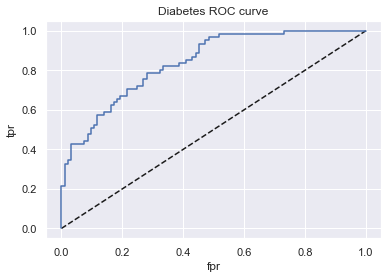

In [44]:
y_pred_proba = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Diabetes ROC curve')
plt.show()

In [45]:
weighted_roc_auc_score = roc_auc_score(y_test, y_pred_proba, average="weighted")
print("ROC Score for Logistic Reg clf is ",weighted_roc_auc_score*100)

ROC Score for Logistic Reg clf is  83.88859509959457


In [48]:
## We can see that the classes are imbalanced, hence we cannot consider accuracy score to select our model.
## We need to check other parameters like f1 score, roc-auc score etc.
## If we compare the fi weighted score of all models, we could see that Logistic regression produces
## the best f1 weighted score.
## But once we see the roc-auc curve, we get to know that its bad , the fpr increases gradually as the tpr increases,
## and also the roc_auc_score is only 83.89%
## But the roc-auc curve produced by random forest seems to be the best, and also it produces the best roc_auc_score of 
## 96.94%.
## Hence we conclude that model which we get using random forest is the best one for this case.

In [ ]:
#Tableau Visualisation can be found in below link
# https://public.tableau.com/profile/aditya.v7957#!/vizhome/DiabetesDataDashboard_16102766526990/DiabeteseDataSetDashboard